In [1]:
import requests
import pandas as pd
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

def get_project_data(project_id):
    API_URL = f"https://pad.crc.nd.edu/api/v2/projects/{project_id}/cards"
    try:
        # fetch_data_from_api
        r = requests.get(url=API_URL,verify=False)  # NOTE: Using verify=False due to a SSL issue, I need a valid certificate, then I will remove this parameter.
        r.raise_for_status() # Raise an exception if the status is not 200
        data = r.json()
        df = pd.json_normalize(data)
        return df
    except requests.exceptions.RequestException as e:
        print(e)
        print(f"Error accessing project data {project_id}: {r.status_code}")
        return None


In [2]:
project_id = 11
df = get_project_data(project_id)

In [3]:
df.columns.to_list()

['id',
 'sample_name',
 'test_name',
 'user_name',
 'date_of_creation',
 'raw_file_location',
 'processed_file_location',
 'processing_date',
 'camera_type_1',
 'notes',
 'sample_id',
 'quantity',
 'deleted',
 'issue',
 'project.id',
 'project.user_name',
 'project.project_name',
 'project.annotation',
 'project.test_name',
 'project.sample_names.sample_names',
 'project.neutral_filler',
 'project.qpc20',
 'project.qpc50',
 'project.qpc80',
 'project.qpc100',
 'project.notes',
 'issue.id',
 'issue.name',
 'issue.description']

In [4]:
## Counting unique values to identify categories in the 'sample_name' column

# Normalize case to lowercase and replace spaces with dashes in 'sample_name'
df['sample_name'] = df['sample_name'].str.lower().str.replace(' ', '-', regex=False)

# Counting unique values to identify categories
print(df['sample_name'].value_counts())

hydroxychloroquine            861
tetracycline                  538
isoniazid                     536
sulfamethoxazole              525
ciprofloxacin                 503
rifampicin                    500
ceftriaxone                   486
ferrous-sulfate               469
pyrazinamide                  460
azithromycin                  452
chloroquine                   450
benzyl-penicillin             446
ripe                          444
ethambutol                    441
epinephrine                   417
promethazine-hydrochloride    415
amoxicillin                   414
albendazole                   380
doxycycline                   269
ampicillin                    251
starch-(maize)                133
calcium-carbonate             119
ascorbic-acid                  88
lactose                        76
unknown                        30
Name: sample_name, dtype: int64


<Axes: xlabel='quantity', ylabel='Count'>

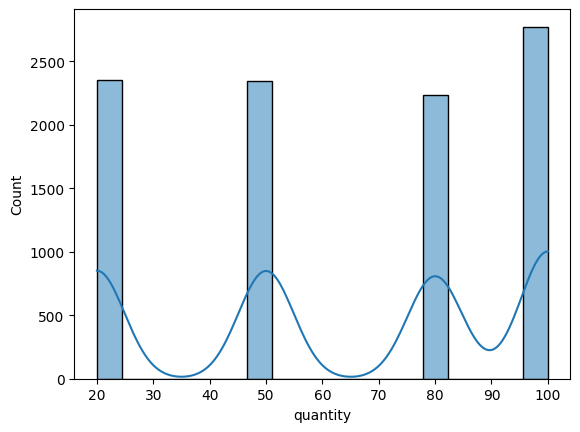

In [5]:
# Distribution visualization for 'quantity'
import seaborn as sns
sns.histplot(data=df, x='quantity', kde=True)

In [6]:
# List unique values for 'quantity'
unique_quantities = df['quantity'].unique()
print("Unique quantities:")
print(unique_quantities)



Unique quantities:
[100  50  20  80]


In [7]:
# Sample random 3 cases for each unique quantity
# If a group has less than 3 entries, it takes all from that group
sample_cases_per_quantity = df.groupby('quantity').apply(lambda x: x.sample(min(len(x), 3)))

print("\nRandom sample cases for unique quantities:")
sample_cases_per_quantity[['id', 'sample_name']]


Random sample cases for unique quantities:


id                 sample_name
quantity                                        
20       1702  16962                 albendazole
         4680  20062                 doxycycline
         943   16203  promethazine-hydrochloride
50       2367  17627           benzyl-penicillin
         3686  19020                tetracycline
         4118  19495                 ceftriaxone
80       9629  25597                        ripe
         2282  17542           benzyl-penicillin
         833   16093  promethazine-hydrochloride
100      3968  19345                 ceftriaxone
         1992  17252           calcium-carbonate
         3850  19205                 ceftriaxone

In [8]:
# Sample cases for unique quantities (e.g., first 3 entries for each quantity)
cols = ['quantity', 'id', 'id_sample', 'sample_name', 'camera_type_1', 'issue.id' ] 
sample_cases_per_quantity = df.groupby('quantity').apply(lambda x: x.head(3))

print("\nSample cases for unique quantities:")

sample_cases_per_quantity[['id', 'sample_name']]



Sample cases for unique quantities:


id  sample_name
quantity                        
20       3    15205    isoniazid
         4    15206    isoniazid
         156  15391  amoxicillin
50       2    15204  doxycycline
         5    15207  doxycycline
         89   15310  amoxicillin
80       33   15249  amoxicillin
         34   15250  amoxicillin
         35   15251  amoxicillin
100      0    15194  chloroquine
         1    15195  chloroquine
         6    15214  amoxicillin

In [9]:

# Define the specific sample_name you're interested in
specific_sample_name = 'lactose'

# Filter the DataFrame for the specific sample_name
specific_df = df[df['sample_name'].str.lower() == specific_sample_name.lower()]

# sample random 3 cases for each unique quantity within the specific sample_name
# If a group has less than 3 entries, it takes all from that group
sample_cases_per_quantity_specific = specific_df.groupby('quantity').apply(lambda x: x.sample(min(len(x), 10)))

print(f"\nRandom sample cases for unique quantities within sample_name '{specific_sample_name}':")
sample_cases_per_quantity_specific[['id', 'sample_id', 'sample_name', 'notes']]   


Random sample cases for unique quantities within sample_name 'lactose':


id  sample_id sample_name  \
quantity                                      
100      1875  17135      53215     lactose   
         1918  17178      53107     lactose   
         1889  17149      53125     lactose   
         1855  17115      53224     lactose   
         1917  17177      53106     lactose   
         1892  17152      53226     lactose   
         1871  17131      53106     lactose   
         1914  17174      53108     lactose   
         1900  17160      53209     lactose   
         1883  17143      53214     lactose   

                                                           notes  
quantity                                                          
100      1875  emailed rectified pad image. batch=n/a, quanti...  
         1918  emailed rectified pad image. batch=n/a, quanti...  
         1889  emailed rectified pad image. batch=n/a, quanti...  
         1855  emailed rectified pad image. batch=n/a, quanti...  
         1917  emailed rectified pad image. batch=n/a, quanti...  
         1892  emailed rectified pad image. batch=n/a, quanti...  
         1871  emailed rectified pad image. batch=n/a, quanti...  
         1914  emailed rectified pad image. batch=n/a, quanti...  
         1900  emailed rectified pad image. batch=n/a, quanti...  
         1883  emailed rectified pad image. batch=n/a, quanti...

In [10]:
import ipyplot
import matplotlib.pyplot as plt



label_column = 'quantity'
data = sample_cases_per_quantity_specific
# Define the base URL
base_url = "https://pad.crc.nd.edu"

# Concatenate to get the full image URLs
data['url'] = base_url + data['processed_file_location']

# The 'url' column now contains the full URLs to the images
images = data['url'].values
labels = data[label_column].values

# Labels for the tabs - unique quantities
labels_list_filtered = data[label_column].unique().tolist()

# Show with tabs
ipyplot.plot_class_tabs(
    images, labels, tabs_order=labels_list_filtered, img_width=150
)

plt.show() 

In [11]:
# Count unique 'sample_id's and total 'id's for each 'sample_name' and 'quantity' group
counts_per_group = df[df['sample_name'] == "lactose"].groupby(['sample_name', 'quantity']).agg({
    'sample_id': 'nunique',  # Counts unique sample_ids
    'id': 'count'            # Counts total ids
})

print("Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:")
counts_per_group

Counts of 'sample_id's and 'id's by 'sample_name' and 'quantity' group:


,,sample_id,id
sample_name,quantity,,
lactose,100,25,76


### Check if the 'processed_file_location' column has valid data

In [ ]:
import ipyplot

# Check if the 'processed_file_location' column has valid data
if 'processed_file_location' in sample_cases_per_quantity_specific:
    # Concatenate to get the full image URLs
    sample_cases_per_quantity_specific['url'] = base_url + sample_cases_per_quantity_specific['processed_file_location']
    
    # Check if URLs are formed correctly
    for url in sample_cases_per_quantity_specific['url'].head():
        print(f"Checking URL: {url}")
        # Try to access the image
        response = requests.head(url)
        if response.status_code == 200:
            print(f"URL is good: {url}")
        else:
            print(f"URL is bad: {url}, Status Code: {response.status_code}")
else:
    print("DataFrame doesn't contain 'processed_file_location' column.")

# Assuming 'sample_cases_per_quantity_specific' is a DataFrame obtained from previous steps
# and contains the 'url' column with the full URLs to the images.
images = sample_cases_per_quantity_specific['url'].values
labels = sample_cases_per_quantity_specific['quantity'].values

# Labels for the tabs - unique quantities
labels_list_filtered = sample_cases_per_quantity_specific['quantity'].unique().tolist()

# Show with tabs
ipyplot.plot_class_tabs(
    images, labels, tabs_order=labels_list_filtered, max_imgs_per_tab=3, img_width=150
)
